# 1. Import Python Modules

In [49]:
# Load necessary python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# 2.  Load Cars Price Dataset

In [50]:
file_path = r"C:\Users\91956\OneDrive\DATA-SCIENCE-NARESHIT-OMKAR\PYTHON\OMKAR-DS\Cars-SecondHand.xlsx"
cars_price_df = pd.read_excel(file_path)
cars_price_df

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,222000.0,5.346353,1,0.000000,6.3,2016
1,Mercedes-Benz,177000.0,5.247973,1,0.000000,5.5,2016
2,Mercedes-Benz,177777.0,5.249876,1,0.000000,5.5,2016
3,Mercedes-Benz,199999.0,5.301028,1,0.000000,5.5,2016
4,Mercedes-Benz,199999.0,5.301028,1,0.000000,5.5,2016
...,...,...,...,...,...,...,...
3998,Toyota,600.0,2.778151,10,1.000000,1.5,1979
3999,Mercedes-Benz,2990.0,3.475671,300,2.477121,2.8,1979
4000,Mercedes-Benz,2300.0,3.361728,261,2.416641,2.3,1978
4001,Mercedes-Benz,5500.0,3.740363,440,2.643453,2.0,1978


# 3. Basic Inspection on dataset

In [51]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())

basic_inspection_dataset(cars_price_df)

top 5 rows - using head
           Brand     Price  log_price  Mileage  log_mileage  EngineV  Year
0  Mercedes-Benz  222000.0   5.346353        1          0.0      6.3  2016
1  Mercedes-Benz  177000.0   5.247973        1          0.0      5.5  2016
2  Mercedes-Benz  177777.0   5.249876        1          0.0      5.5  2016
3  Mercedes-Benz  199999.0   5.301028        1          0.0      5.5  2016
4  Mercedes-Benz  199999.0   5.301028        1          0.0      5.5  2016

bottom 5 rows using tail
              Brand    Price  log_price  Mileage  log_mileage  EngineV  Year
3998         Toyota    600.0   2.778151       10     1.000000      1.5  1979
3999  Mercedes-Benz   2990.0   3.475671      300     2.477121      2.8  1979
4000  Mercedes-Benz   2300.0   3.361728      261     2.416641      2.3  1978
4001  Mercedes-Benz   5500.0   3.740363      440     2.643453      2.0  1978
4002  Mercedes-Benz  34999.0   4.544056      150     2.176091      2.8  1969

numbers of samples and columns
(4003,

# 4. Categorical- Variable - Analysis -Using Pipeline

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [53]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%0.2f%%', startangle=40)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Brand frequency table
+---+---------------+-----------+
|   |     Class     | Frequency |
+---+---------------+-----------+
| 0 |  Volkswagen   |    875    |
| 1 | Mercedes-Benz |    820    |
| 2 |      BMW      |    636    |
| 3 |    Toyota     |    509    |
| 4 |    Renault    |    438    |
| 5 |     Audi      |    419    |
| 6 |  Mitsubishi   |    306    |
+---+---------------+-----------+
Brand Relative frequency table
+---+---------------+-----------+----------------------+
|   |     Class     | Frequency | Relative Frequency % |
+---+---------------+-----------+----------------------+
| 0 |  Volkswagen   |    875    |        21.86         |
| 1 | Mercedes-Benz |    820    |        20.48         |
| 2 |      BMW      |    636    |        15.89         |
| 3 |    Toyota     |    509    |        12.72         |
| 4 |    Renault    |    438    |        10.94         |
| 5 |     Audi      |    419    |        10.47         |
| 6 |  Mitsubishi   |    306    |         7.64         |
+--

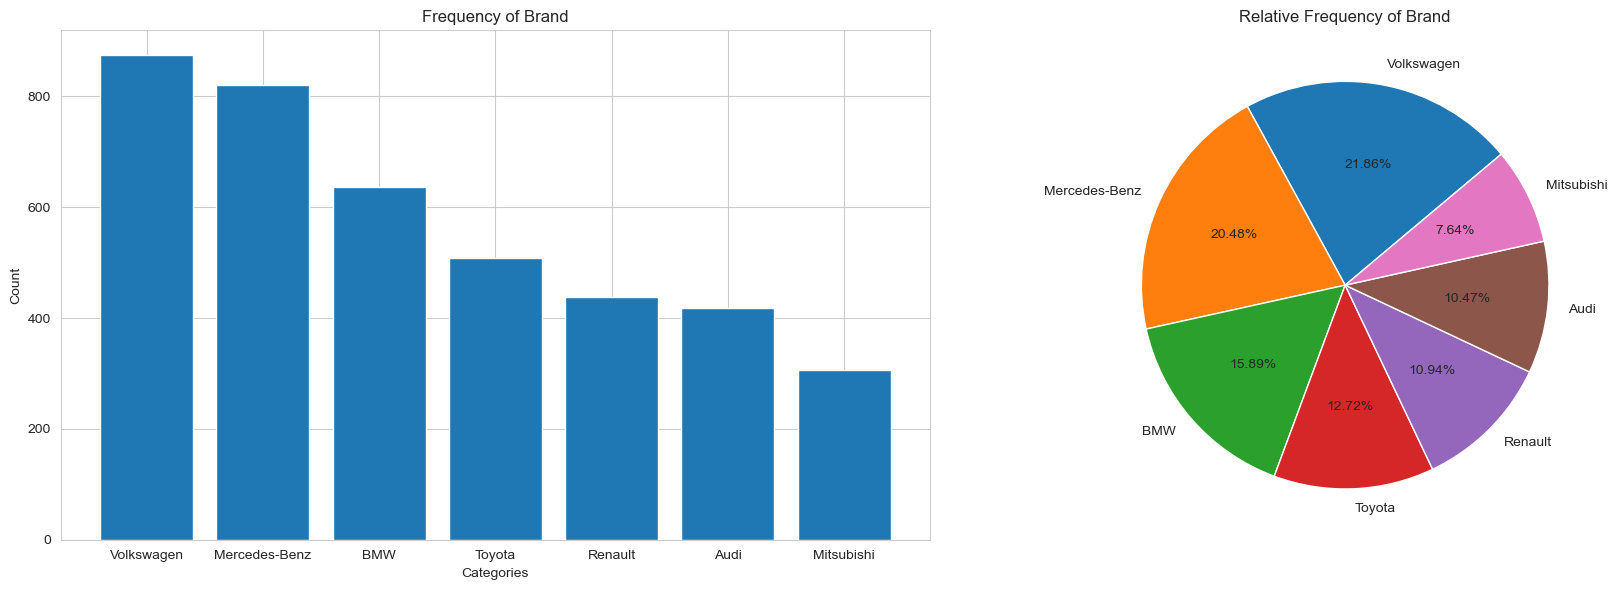

In [54]:
pipeline_cat_var = Pipeline([
    ('bar_pie_chart', BarPieChartTransformer())
])



# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(cars_price_df)

# 5. Numerical - Variables - Analysis - Using -Pipeline

In [55]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
            var_min = int(df[con_var].min())
            var_max = int(df[con_var].max())
            
            step = int(round((var_max-var_min)/10))
            bins = [x for x in range(var_min,var_max+1,step)]
            print(f"{con_var} bins {bins}")
            freq_table = pd.cut(df[con_var], bins=bins).value_counts().sort_index()

            table_frame = pd.DataFrame({
            'Interval': freq_table.index,
            'Frequency': freq_table.values,
            })
            print(f"Frequency Distribution Table for {con_var}:")


            # Print the result as a table
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = table_frame['Frequency'].sum()
            table_frame['Relative Frequency %'] = round((table_frame['Frequency'] / total_count)*100,2)
            # Print the result as a table
            print(f"Relative Frequency Distribution Table for {con_var}:")
            print(tabulate(table_frame, headers='keys', tablefmt='pretty'))
            
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], bins=bins, color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, bins=bins, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Box-Plot - {con_var}')
            sns.boxplot(x=con_var, data=df)
            plt.show()


            sns.set_style("whitegrid")
            plt.figure(figsize=(10, 6))
            plt.title(f'Violin Plot - {con_var}')
            sns.violinplot(x=con_var, data=df)
            plt.show()
        


Price bins [600, 30540, 60480, 90420, 120360, 150300, 180240, 210180, 240120, 270060, 300000]
Frequency Distribution Table for Price:
+---+------------------+-----------+
|   |     Interval     | Frequency |
+---+------------------+-----------+
| 0 |   (600, 30540]   |   3364    |
| 1 |  (30540, 60480]  |    413    |
| 2 |  (60480, 90420]  |    122    |
| 3 | (90420, 120360]  |    51     |
| 4 | (120360, 150300] |    22     |
| 5 | (150300, 180240] |     9     |
| 6 | (180240, 210180] |    11     |
| 7 | (210180, 240120] |     3     |
| 8 | (240120, 270060] |     2     |
| 9 | (270060, 300000] |     4     |
+---+------------------+-----------+
Relative Frequency Distribution Table for Price:
+---+------------------+-----------+----------------------+
|   |     Interval     | Frequency | Relative Frequency % |
+---+------------------+-----------+----------------------+
| 0 |   (600, 30540]   |   3364    |        84.08         |
| 1 |  (30540, 60480]  |    413    |        10.32         |

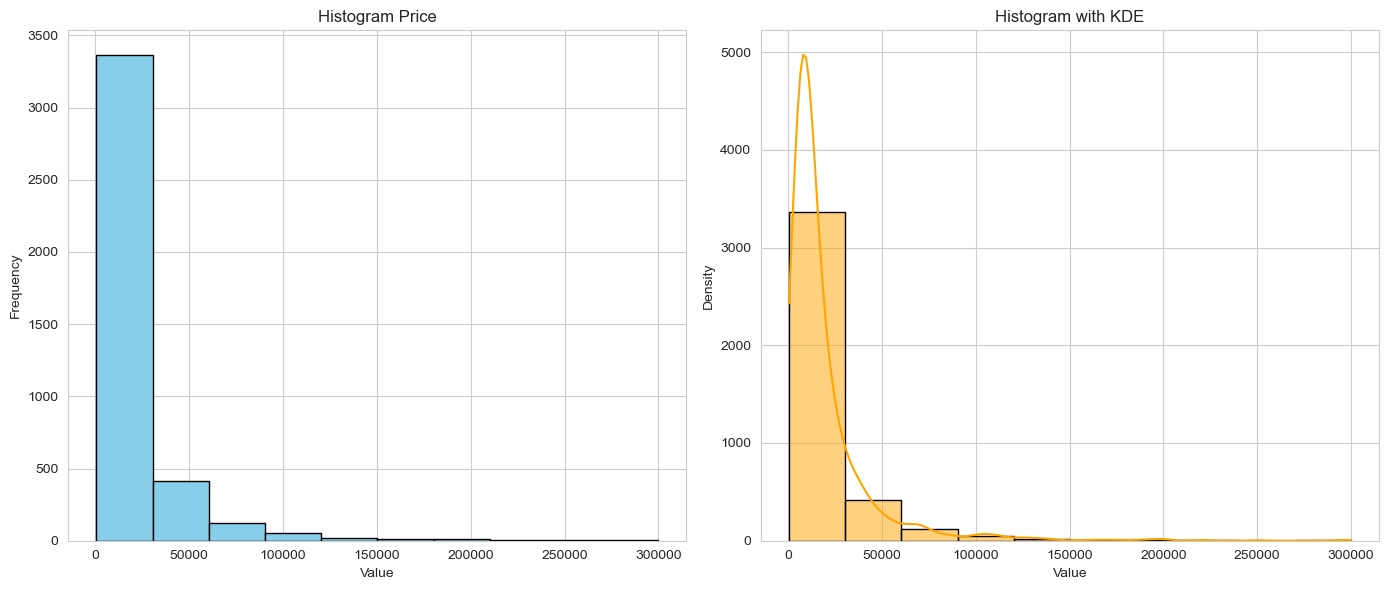

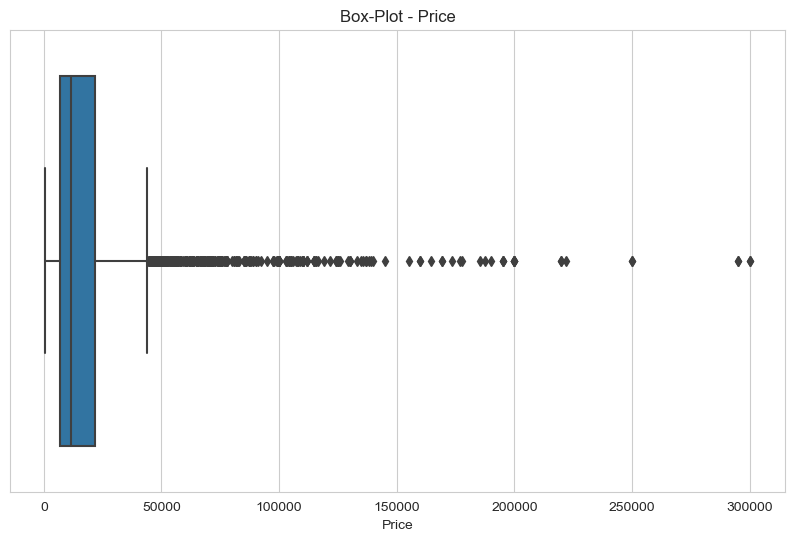

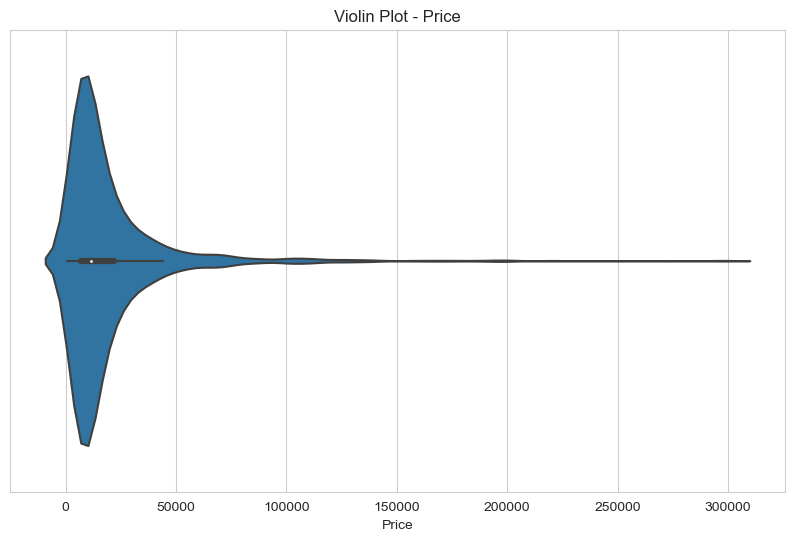

Mileage bins [1, 99, 197, 295, 393, 491, 589, 687, 785, 883]
Frequency Distribution Table for Mileage:
+---+------------+-----------+
|   |  Interval  | Frequency |
+---+------------+-----------+
| 0 |  (1, 99]   |    864    |
| 1 | (99, 197]  |   1482    |
| 2 | (197, 295] |    994    |
| 3 | (295, 393] |    315    |
| 4 | (393, 491] |    72     |
| 5 | (491, 589] |    12     |
| 6 | (589, 687] |     3     |
| 7 | (687, 785] |     0     |
| 8 | (785, 883] |     2     |
+---+------------+-----------+
Relative Frequency Distribution Table for Mileage:
+---+------------+-----------+----------------------+
|   |  Interval  | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |  (1, 99]   |    864    |        23.08         |
| 1 | (99, 197]  |   1482    |        39.58         |
| 2 | (197, 295] |    994    |        26.55         |
| 3 | (295, 393] |    315    |         8.41         |
| 4 | (393, 491] |    72     |         1.92         |
| 5 | (491,

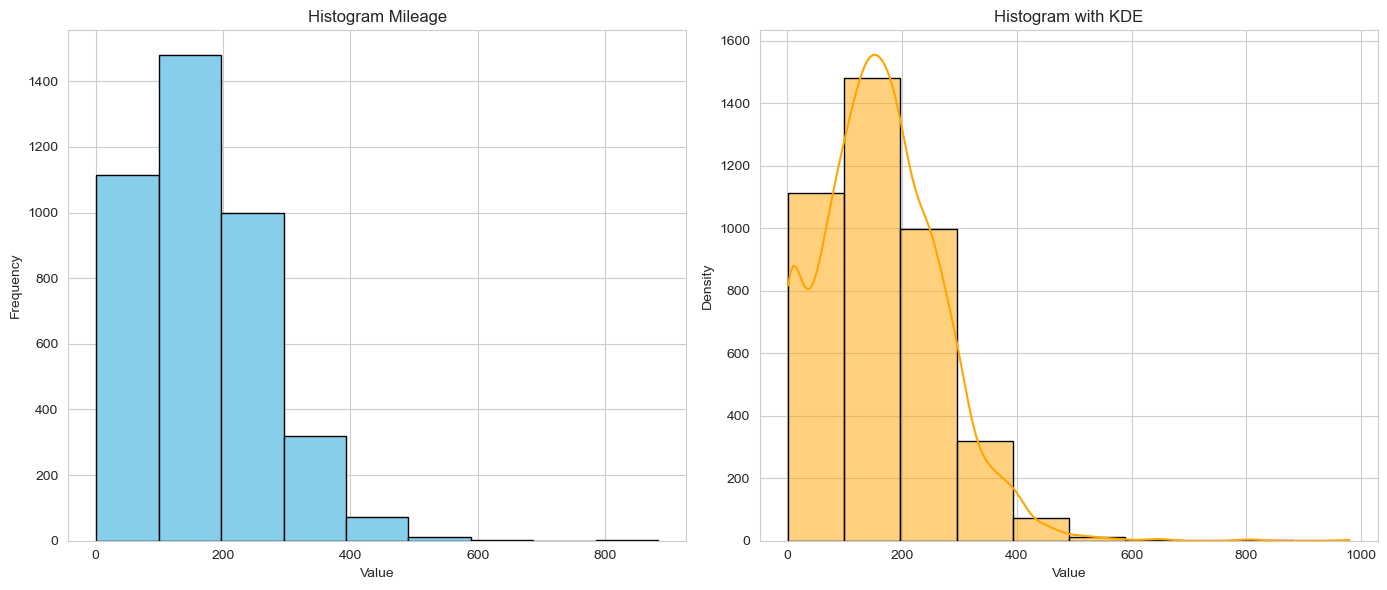

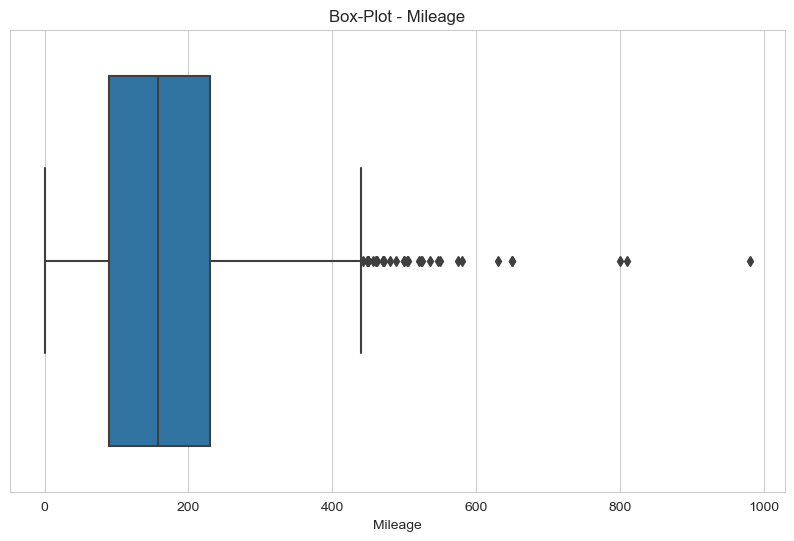

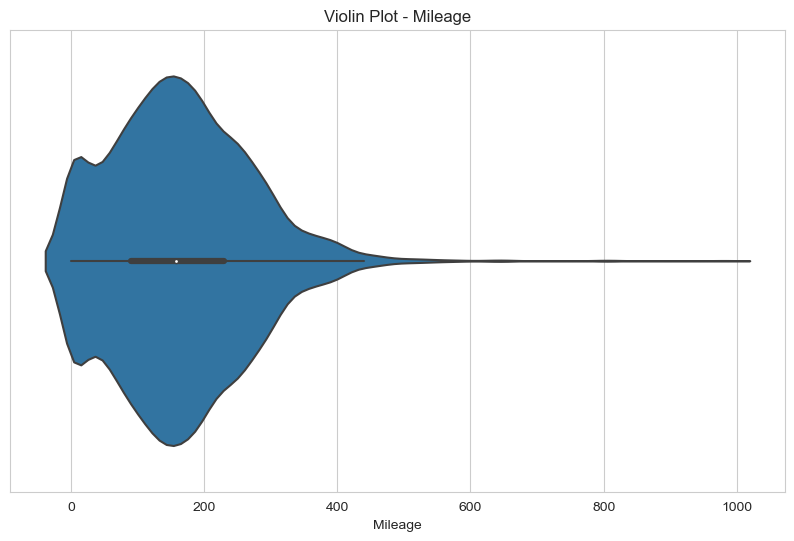

EngineV bins [0, 1, 2, 3, 4, 5, 6]
Frequency Distribution Table for EngineV:
+---+----------+-----------+
|   | Interval | Frequency |
+---+----------+-----------+
| 0 |  (0, 1]  |    18     |
| 1 |  (1, 2]  |   1911    |
| 2 |  (2, 3]  |   1452    |
| 3 |  (3, 4]  |    273    |
| 4 |  (4, 5]  |    249    |
| 5 |  (5, 6]  |    81     |
+---+----------+-----------+
Relative Frequency Distribution Table for EngineV:
+---+----------+-----------+----------------------+
|   | Interval | Frequency | Relative Frequency % |
+---+----------+-----------+----------------------+
| 0 |  (0, 1]  |    18     |         0.45         |
| 1 |  (1, 2]  |   1911    |        47.97         |
| 2 |  (2, 3]  |   1452    |        36.45         |
| 3 |  (3, 4]  |    273    |         6.85         |
| 4 |  (4, 5]  |    249    |         6.25         |
| 5 |  (5, 6]  |    81     |         2.03         |
+---+----------+-----------+----------------------+


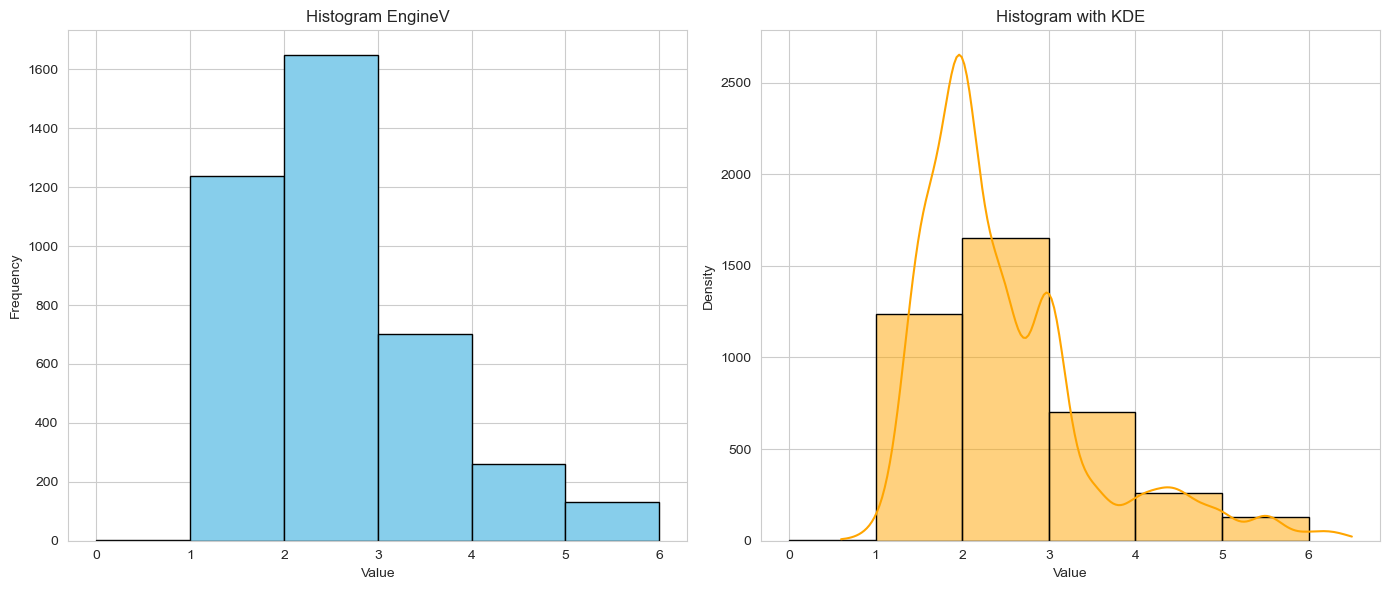

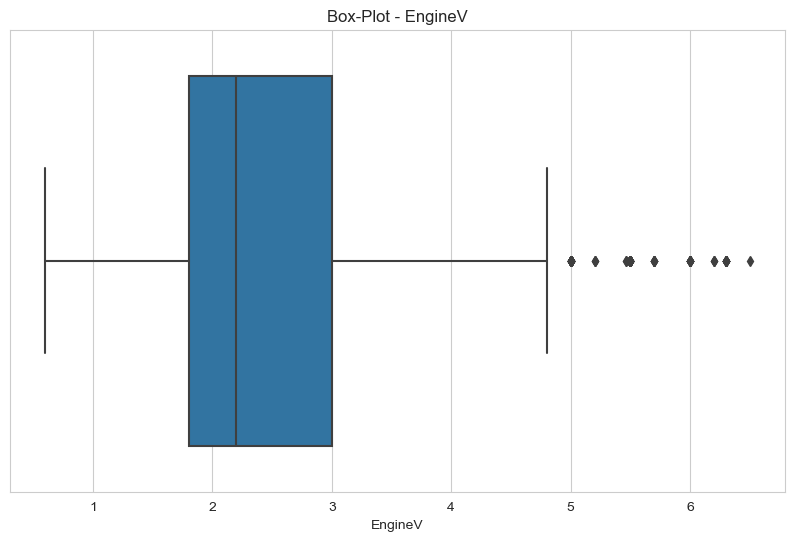

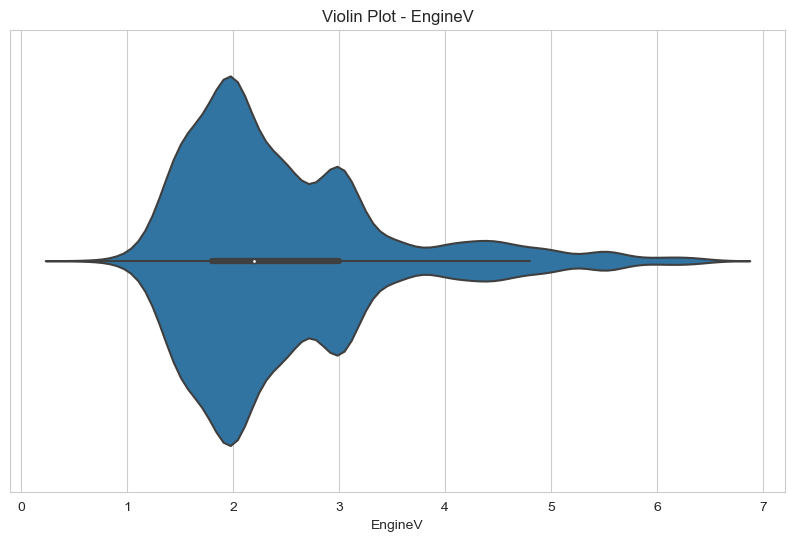

Year bins [1969, 1974, 1979, 1984, 1989, 1994, 1999, 2004, 2009, 2014]
Frequency Distribution Table for Year:
+---+--------------+-----------+
|   |   Interval   | Frequency |
+---+--------------+-----------+
| 0 | (1969, 1974] |     0     |
| 1 | (1974, 1979] |     5     |
| 2 | (1979, 1984] |     9     |
| 3 | (1984, 1989] |    85     |
| 4 | (1989, 1994] |    135    |
| 5 | (1994, 1999] |    356    |
| 6 | (1999, 2004] |    703    |
| 7 | (2004, 2009] |   1221    |
| 8 | (2009, 2014] |   1192    |
+---+--------------+-----------+
Relative Frequency Distribution Table for Year:
+---+--------------+-----------+----------------------+
|   |   Interval   | Frequency | Relative Frequency % |
+---+--------------+-----------+----------------------+
| 0 | (1969, 1974] |     0     |         0.0          |
| 1 | (1974, 1979] |     5     |         0.13         |
| 2 | (1979, 1984] |     9     |         0.24         |
| 3 | (1984, 1989] |    85     |         2.29         |
| 4 | (1989, 1994] | 

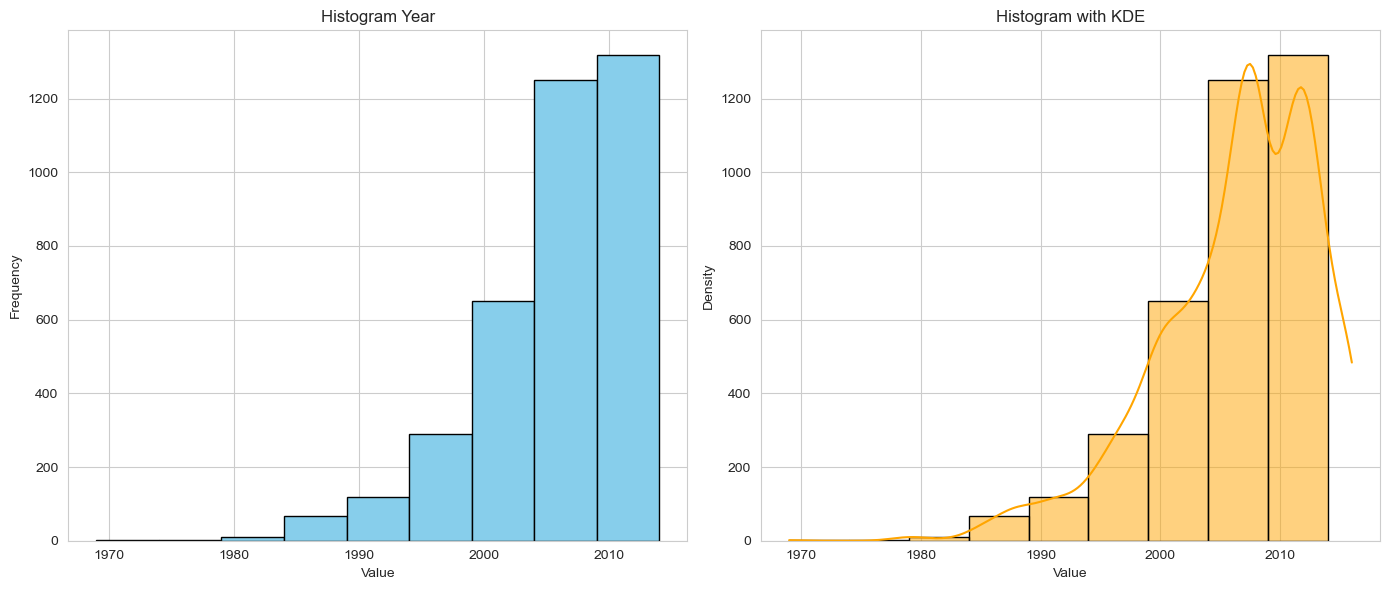

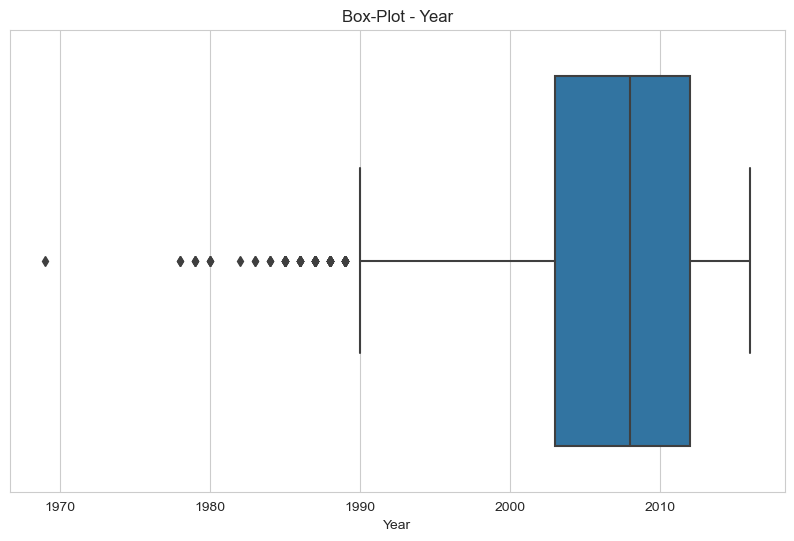

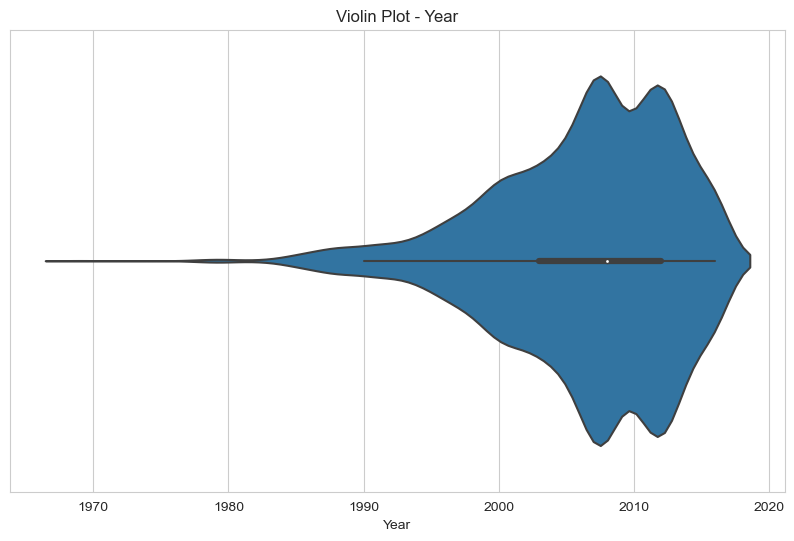

In [56]:
pipeline_num_var = Pipeline([
    ('hist_box_chart', HistBoxChartTransformer())
])

cars_price_num_df = cars_price_df[['Price', 'Mileage', 'EngineV', 'Year']]
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(cars_price_num_df)

Index(['Brand', 'Price', 'log_price', 'Mileage', 'log_mileage', 'EngineV',
       'Year'],
      dtype='object')


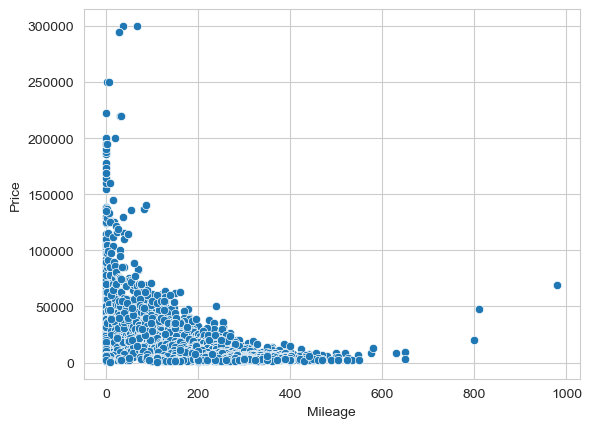

In [57]:
print(cars_price_df.columns)
sns.scatterplot(data=cars_price_df,y='Price',x='Mileage')
plt.show()

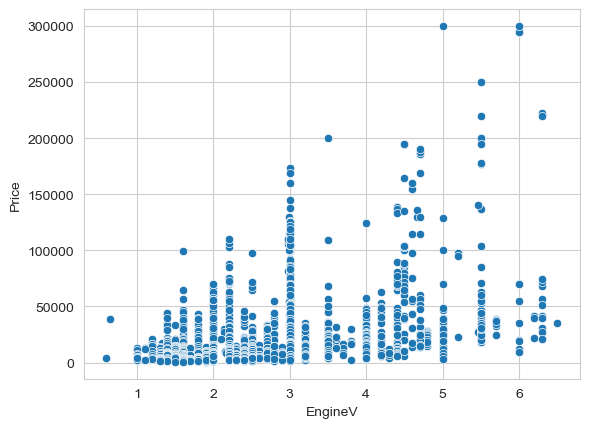

In [58]:
sns.scatterplot(data=cars_price_df,y='Price',x='EngineV')
plt.show()

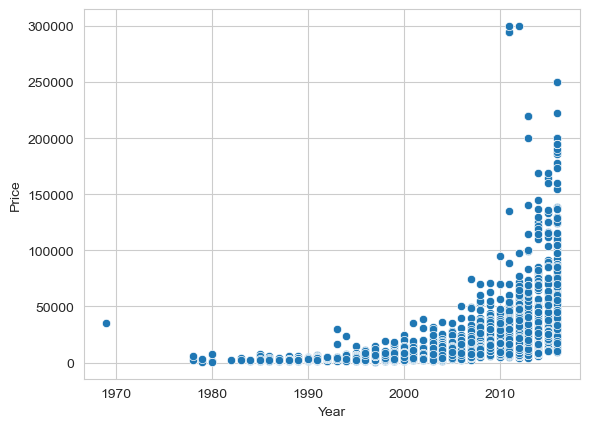

In [59]:
sns.scatterplot(data=cars_price_df,y='Price',x='Year')
plt.show()

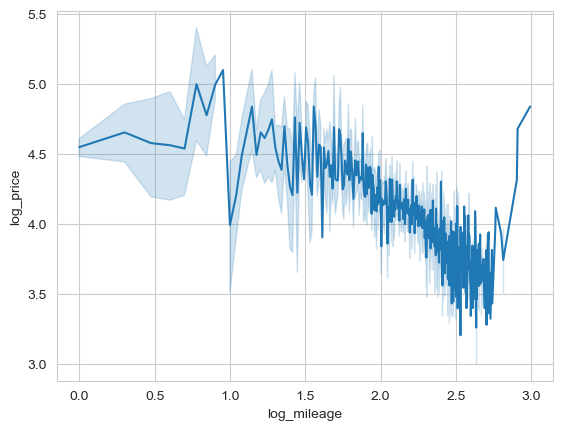

In [60]:
sns.lineplot(data=cars_price_df,y='log_price',x='log_mileage')
plt.show()

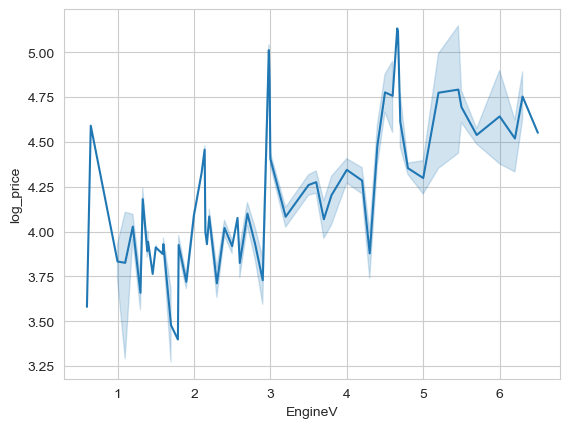

In [61]:
sns.lineplot(data=cars_price_df,y='log_price',x='EngineV')
plt.show()

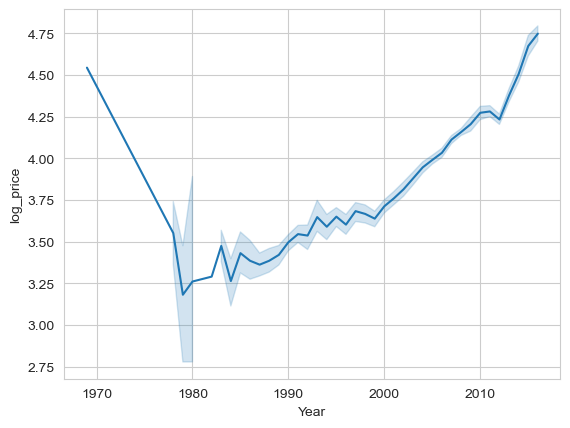

In [62]:
sns.lineplot(data=cars_price_df,y='log_price',x='Year')
plt.show()

In [63]:
cars_price_num_df.columns

Index(['Price', 'Mileage', 'EngineV', 'Year'], dtype='object')

In [64]:
 cars_price_num_df[['Mileage', 'EngineV', 'Year']].corr()

,Mileage,EngineV,Year
Mileage,1.000000,-0.034214,-0.664027
EngineV,-0.034214,1.000000,0.038890
Year,-0.664027,0.038890,1.000000


In [65]:
import statsmodels.api as sm
# Add a constant term to the input variables
for i in ['Mileage', 'EngineV', 'Year']:
    X = sm.add_constant(cars_price_df[i])

    # Fit a linear regression model
    model = sm.OLS(cars_price_df['log_price'], X)
    results = model.fit()

    # Print the regression results summary
    print(results.summary())

    # Calculate the R2 score
    print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2148.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:36:18   Log-Likelihood:                -1203.5
No. Observations:                4003   AIC:                             2411.
Df Residuals:                    4001   BIC:                             2424.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4668      0.010    462.195      0.0

In [66]:

X = sm.add_constant(cars_price_df[ ['log_mileage', 'EngineV', 'Year']])

# Fit a linear regression model
model = sm.OLS(cars_price_df['log_price'], X)
results = model.fit()

# Print the regression results summary
print(results.summary())

# Calculate the R2 score
print(f"R2 score: {results.rsquared}")

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     4439.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:36:19   Log-Likelihood:                 869.79
No. Observations:                4003   AIC:                            -1732.
Df Residuals:                    3999   BIC:                            -1706.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -73.7602      1.072    -68.807      

In [67]:
# Create dummy variables for the 'Category' column, dropping the first one
dummy_df = pd.get_dummies(cars_price_df['Brand'], prefix='Category', drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_with_dumy = pd.concat([cars_price_df, dummy_df], axis=1)

In [68]:
df_with_dumy

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year,Category_Audi,Category_BMW,Category_Mercedes-Benz,Category_Mitsubishi,Category_Renault,Category_Toyota,Category_Volkswagen
0,Mercedes-Benz,222000.0,5.346353,1,0.000000,6.3,2016,False,False,True,False,False,False,False
1,Mercedes-Benz,177000.0,5.247973,1,0.000000,5.5,2016,False,False,True,False,False,False,False
2,Mercedes-Benz,177777.0,5.249876,1,0.000000,5.5,2016,False,False,True,False,False,False,False
3,Mercedes-Benz,199999.0,5.301028,1,0.000000,5.5,2016,False,False,True,False,False,False,False
4,Mercedes-Benz,199999.0,5.301028,1,0.000000,5.5,2016,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998,Toyota,600.0,2.778151,10,1.000000,1.5,1979,False,False,False,False,False,True,False
3999,Mercedes-Benz,2990.0,3.475671,300,2.477121,2.8,1979,False,False,True,False,False,False,False
4000,Mercedes-Benz,2300.0,3.361728,261,2.416641,2.3,1978,False,False,True,False,False,False,False
4001,Mercedes-Benz,5500.0,3.740363,440,2.643453,2.0,1978,False,False,True,False,False,False,False


# 6. ML - Linear Regression Model

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [70]:
X=df_with_dumy.drop(['Brand','Category_Volkswagen','Mileage','Price','log_price'],axis='columns')
Y=df_with_dumy['log_price']

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)
print("train data length:",len(X_train))
print("test data length:",len(X_test))
X.columns

train data length: 2802
test data length: 1201


Index(['log_mileage', 'EngineV', 'Year', 'Category_Audi', 'Category_BMW',
       'Category_Mercedes-Benz', 'Category_Mitsubishi', 'Category_Renault',
       'Category_Toyota'],
      dtype='object')

In [74]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
print('Coefficients: ', lr.coef_)
print('Intercept:',lr.intercept_)
print("train R2 Score:",lr.score(X_train,Y_train))
print("Test R2 Score:",lr.score(X_test,Y_test))
print("Test R2 score:",r2_score(Y_test,Y_pred))
print("MSE:",mean_squared_error(Y_test,Y_pred))
print("RMSE:",mean_squared_error(Y_test,Y_pred,squared=False))

Coefficients:  [-0.10413718  0.13633157  0.04203633  0.06822048  0.10831646  0.10259742
 -0.0502025  -0.16867379  0.04985727]
Intercept: -80.4111956208005
train R2 Score: 0.8065990179658366
Test R2 Score: 0.7894306061425819
Test R2 score: 0.7894306061425819
MSE: 0.03470069705685517
RMSE: 0.18628123109120567
